<h1>3030ICT Assignment</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

%matplotlib inline

df = pd.read_csv('data.csv')

C:\Users\juliu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#check that data was properly loaded and get some initial information about the data
display(df.head(3))
df.info()
print('\nNa values:')
print(df.isna().sum())
print('\nDuplicated rows:', df.duplicated().sum())

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB

Na values:
Id                        0
Title                     0
Company               12004
Date                 

In [3]:
# remove duplicates
print('Duplicates before:',df.drop(columns=['Id']).duplicated().sum())
print(df.shape)
df.drop_duplicates(subset=df.columns.difference(['Id']), inplace=True)
print('\nDuplicates after:', df.drop(columns=['Id']).duplicated().sum())
print(df.shape)

Duplicates before: 8607
(318477, 13)

Duplicates after: 0
(309870, 13)


<h2>Part 1 – Data Preparation and Preprocessing. [15 points]</h2>

<h3>1. Describe the dataset. (8 points)</h3>

<ul>
    <li>Describe the dataset (e.g.: type of column, value range). (1 point) </li>
    <li>How many records are there in the dataset? (1 point) </li>
    <li>Which period does it cover? How many different dates have job postings? (1 point) </li>
    <li>How many locations does the dataset have? Which location has the most job postings? (1 point) </li>
    <li>How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings. (1 point) </li>
    <li>Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number. (1 point) </li>
    <li>List the salary ranges and their total of job postings. (1 point) </li>
    <li>List the job types. In each job type, what are the lowest salary and highest salary? (1 point)</li>
</ul>

In [ ]:
#Ben

<h3>2. Normalize and clean data. (7 points)</h3>

<ul>
    <li>The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job. (1 point)</li>
    <li>The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters. (1 point)</li>
    <li>The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 point)</li>
    <li>Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 point) </li>
</ul>

In [ ]:
#Julius

In [4]:
# 1.
df['AverageSalary'] = (df['HighestSalary'] + df['LowestSalary']) / 2
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0


In [5]:
# 2.
print('Before:')
print(df['Id'].describe())

# single out only rows with ids not consisting of exactly 8 digits
irregularIdsDf = df[df['Id'].str.match(r'^(?!^\d{8}$).*$', na=False)] 
display(irregularIdsDf.head(3)) # see what the irregular ids look like
print('Shape before slicing: ', irregularIdsDf.shape) # see how many rows have irregular ids

df['Id'] = df['Id'].astype(str) # explicitly set type of Id column as string so each id is iterable
df['Id'] = [x[:8] for x in df['Id']] # reset the id to the first 8 characters of the id

# recheck to see if there are still some irregular ids
irregularIdsDf = df[df['Id'].str.match(r'^(?!^\d{8}$).*$', na=False)] 
print('Shape after slicing: ', irregularIdsDf.shape, '\n')

print('After:')
print(df['Id'].describe(), '\n')
print('Duplicated rows now:', df.duplicated(subset=['Id']).sum())

Before:
count       309870
unique      309870
top       37404348
freq             1
Name: Id, dtype: int64


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
153767,37915260&searchrequesttoken=e859cc74-e22f-498d...,Shift Supervisor / Delivery Driver / Juniors,PIZZA HUT SOUTH MACKAY,2018-12-11T00:00:00.000Z,Mackay & Coalfields,NaN,Retail & Consumer Products,Management - Store,Shift Supervisor / Delivery Drivers / Juniors,NaN,0,30,NaN,15.0
153768,37915238&searchrequesttoken=e859cc74-e22f-498d...,Sales Support Administrator,Registry Australia,2018-12-11T00:00:00.000Z,Perth,"CBD, Inner & Western Suburbs",Administration & Office Support,Client & Sales Administration,Great opportunity to work at one of Australia'...,NaN,0,30,NaN,15.0
153769,37915306&searchrequesttoken=e859cc74-e22f-498d...,Part time Café All-rounder in Docklands,Jora Local,2018-12-11T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe/retail shop in Docklands is seeking a p...,NaN,0,30,NaN,15.0


Shape before slicing:  (43144, 14)
Shape after slicing:  (0, 14) 

After:
count       309870
unique      295902
top       37936524
freq             4
Name: Id, dtype: object 

Duplicated rows now: 13968


In [6]:
# drop duplicated rows
df.drop_duplicates(subset=['Id'], inplace=True)
print('Duplicated rows now:', df.duplicated(subset=['Id']).sum())
df.shape

Duplicated rows now: 0


(295902, 14)

In [7]:
# 3.
print('Before:')
print(df['Date'].describe())
display(df.head(1))

df['Date'] = pd.to_datetime(df['Date']) # convert to datetime
df['Date'] = df['Date'].dt.date # format to only date

print('After:')
print(df['Date'].describe())
display(df.head(1))

Before:
count                       295902
unique                         163
top       2018-10-17T00:00:00.000Z
freq                         12992
Name: Date, dtype: object


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0


After:
count         295902
unique           163
top       2018-10-17
freq           12992
Name: Date, dtype: object


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0


In [8]:
# 4.
print('Before:')
print(df.dtypes, '\n')
df['Id'] = pd.to_numeric(df['Id'])
print('After:')
print(df.dtypes)

Before:
Id                    object
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary           int64
HighestSalary          int64
JobType               object
AverageSalary        float64
dtype: object 

After:
Id                     int64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary           int64
HighestSalary          int64
JobType               object
AverageSalary        float64
dtype: object


<h2>Part 2 – Data Understanding. [5 points] </h2>

<ul>
    <li>Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. (1 point)</li>
    <li>Display the list of job types and the number of jobs of each type using pie chart. (1 point)</li>
    <li>Display the list of job sectors and the number of jobs of each type using horizontal bar chart. (1 point)</li>
    <li>Choose your favorite location. Visualize the market share of that location in pie chart. (1 point)</li>
    <li>Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart. (1 point)</li>
</ul>

In [ ]:
#1-3 -> Julius
#4-5 -> Ben

,AverageSalary,Count
0,15.0,61031
1,45.0,32290
2,75.0,26029
3,65.0,25624
4,110.0,25521
5,55.0,24744
6,175.0,23298
7,90.0,23098
8,35.0,22877
9,135.0,21494


Text(0, 0.5, 'Count')

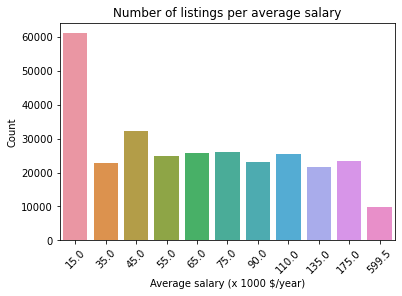

In [9]:
# 1.
# create a new dataframe with the occurances of each average salary value
salaryDistribution = df['AverageSalary'].value_counts().rename_axis('AverageSalary').reset_index(name='Count')
display(salaryDistribution)

salaryDistChart = sns.barplot(x="AverageSalary", y="Count", data=salaryDistribution)
salaryDistChart.set_xticklabels(salaryDistChart.get_xticklabels(), rotation=45)
plt.title('Number of listings per average salary')
plt.xlabel('Average salary (x 1000 $/year)')
plt.ylabel('Count')

List of unique job types:
[nan 'Full Time' 'Contract/Temp' 'Part Time' 'Casual/Vacation']


,JobType,Count
0,Full Time,186684
1,Contract/Temp,50348
2,Casual/Vacation,23921
3,Part Time,20447


Text(0.5, 1.0, 'Listings by job type')

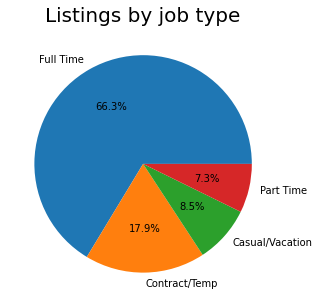

In [10]:
# 2.
print('List of unique job types:')
print(df['JobType'].unique())

typeDistribution = df['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')
display(typeDistribution)

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(typeDistribution['Count'], labels=typeDistribution['JobType'], autopct='%1.1f%%')
plt.title('Listings by job type', size=20)

List of unique classifications:
['Retail & Consumer Products' 'Call Centre & Customer Service'
 'Hospitality & Tourism' 'Banking & Financial Services'
 'Manufacturing, Transport & Logistics' 'Sales'
 'Administration & Office Support' 'Trades & Services' 'Accounting'
 'Real Estate & Property' 'Healthcare & Medical'
 'Marketing & Communications' 'Government & Defence'
 'Information & Communication Technology' 'Education & Training'
 'Community Services & Development' 'Mining, Resources & Energy'
 'Human Resources & Recruitment' 'Insurance & Superannuation'
 'Engineering' 'CEO & General Management' 'Design & Architecture' 'Legal'
 'Construction' 'Sport & Recreation' 'Science & Technology'
 'Advertising, Arts & Media' 'Farming, Animals & Conservation'
 'Self Employment' 'Consulting & Strategy' nan]


,Classification,Count
0,Information & Communication Technology,20960
1,Trades & Services,16849
2,Healthcare & Medical,15733
3,Hospitality & Tourism,14346
4,"Manufacturing, Transport & Logistics",11541
5,Administration & Office Support,9440
6,Accounting,8682
7,Education & Training,8496
8,Construction,7718
9,Sales,7543


Text(0, 0.5, 'Classification')

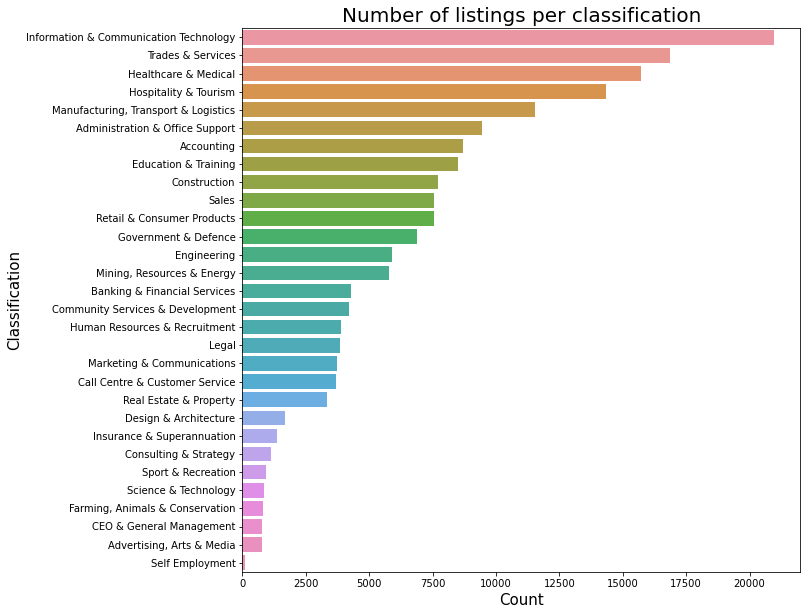

In [11]:
# 3.
print('List of unique classifications:')
print(df['Classification'].unique())

classificationDistribution = df['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')
display(classificationDistribution)

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(ax=ax, data=classificationDistribution, x='Count', y='Classification')
plt.title('Number of listings per classification', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Classification', size=15)

<h2>Part 3 – Data Analysis and Visualisation. [6 points]</h2>

<h3>1. Analyse by comparison. (2 points)</h3>

Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions:
<ul>
    <li>Which city has more jobs? How many jobs each type (casual, fulltime, etc.) are there in each city? </li>
    <li>In each city, which are top 5 job sectors? How many jobs are there in each sector? </li>
    <li>Visualise the top 5 job sectors in pie chart for each city.* </li>
    <li>In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid? </li>
    <li>List top 5 companies in each city? Which sectors do they belong to? </li>
    <li>Between 2 cities, which do you think it is better for employees. Explain your choice.*</li>
<ul>

In [ ]:
#1-3 -> Julius
#4-6 -> Ben

In [12]:
# We chose Brisbane and Adelaide
# 1.
brisbane = df.loc[df['Location'] == 'Brisbane'].copy()
adelaide = df.loc[df['Location'] == 'Adelaide'].copy()

print('Number of job listings in Brisbane:', brisbane.shape[0])
print('Number of job listings in Adelaide:', adelaide.shape[0], '\n')
print('Brisbane has more jobs.')

Number of job listings in Brisbane: 19899
Number of job listings in Adelaide: 6123 

Brisbane has more jobs.


In [13]:
brisbane['JobType'].fillna('Unspecified', inplace=True)
adelaide['JobType'].fillna('Unspecified', inplace=True)
brisbaneTypeDist = brisbane['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')
adelaideTypeDist = adelaide['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')

print('Brisbane:')
display(brisbaneTypeDist)

print('\nAdelaide:')
display(adelaideTypeDist)

Brisbane:


,JobType,Count
0,Full Time,12078
1,Contract/Temp,3813
2,Casual/Vacation,1760
3,Part Time,1128
4,Unspecified,1120



Adelaide:


,JobType,Count
0,Full Time,3638
1,Contract/Temp,982
2,Casual/Vacation,730
3,Part Time,467
4,Unspecified,306


In [14]:
# 2.
brisbane['Classification'].fillna('Unspecified', inplace=True)
adelaide['Classification'].fillna('Unspecified', inplace=True)
brisbaneClassificationDist = brisbane['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')
adelaideClassificationDist = adelaide['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')

print('Brisbane:')
display(brisbaneClassificationDist.head())

print('\nAdelaide:')
display(adelaideClassificationDist.head())

Brisbane:


,Classification,Count
0,Information & Communication Technology,2550
1,Trades & Services,1896
2,Healthcare & Medical,1680
3,"Manufacturing, Transport & Logistics",1563
4,Hospitality & Tourism,1237



Adelaide:


,Classification,Count
0,Trades & Services,761
1,Healthcare & Medical,728
2,"Manufacturing, Transport & Logistics",518
3,Information & Communication Technology,479
4,Hospitality & Tourism,461


Text(0.5, 1.0, 'Listings by classification (Adelaide)')

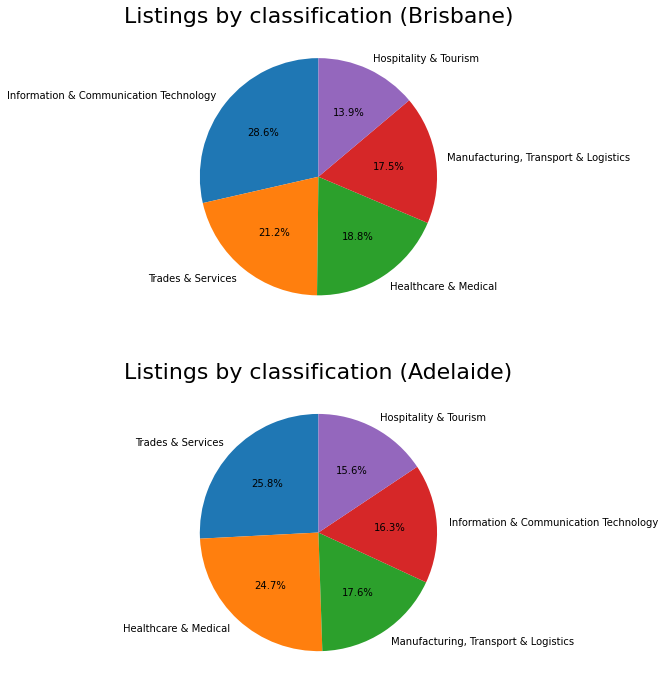

In [15]:
# 3.
brisbaneTop5Classification = brisbaneClassificationDist.sort_values('Count', ascending = False).head(5)
adelaideTop5Classification = adelaideClassificationDist.sort_values('Count', ascending = False).head(5)

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].pie(brisbaneTop5Classification['Count'], labels=brisbaneTop5Classification['Classification'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Listings by classification (Brisbane)', size=22)

axs[1].pie(adelaideTop5Classification['Count'], labels=adelaideTop5Classification['Classification'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Listings by classification (Adelaide)', size=22)

<h3>2. Analyse by time. (2 points) </h3>

In this part, we will analyse the jobs based on the posting date. 
<ul>
    <li>Visualise the number of job posts by month</li>
    <li>Visualise the number of job posts by day of week.</li>
    <li>Visualise the number of job posts by day of the month.</li>
    <li>Visualise trending of the job postings for the big cities.*</li>
    <li>Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.</li>
</ul>

In [ ]:
#Ben

<h3>3. Forecasting and skill extractions. (2 points)</h3>

<ul>
    <li>Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.**</li>
    <li>Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**.</li>
</ul>


In [ ]:
#Julius

Text(0, 0.5, 'Count')

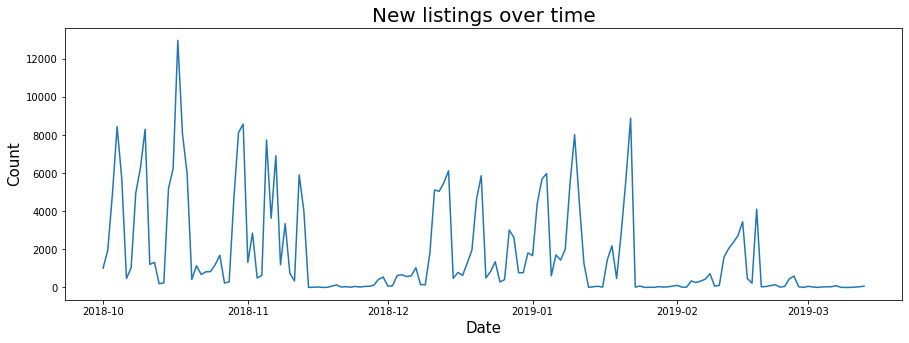

In [16]:
# 1.
dateDistribution = df.copy()

dateDistribution = dateDistribution['Date'].value_counts().rename_axis('Date').reset_index(name='Count')
dateDistribution.sort_values(by='Date', inplace=True, ignore_index=True)

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(ax=ax, data=dateDistribution, x='Date', y='Count')
plt.title('New listings over time', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Count', size=15)

In [17]:
def get_moving_average(data, k, to_period):
    ma_df = pd.DataFrame(columns=['Date','Count'])
    for m in range(0, to_period):
        if m < k:
            prediction = float('nan')
        else:
            history = data['Count'][m-k:m]
            prediction = history.mean()
        ma_df.loc[m] = [data.Date[0] + pd.Timedelta(days=m+1), prediction]       
    return ma_df

Text(0, 0.5, 'Count')

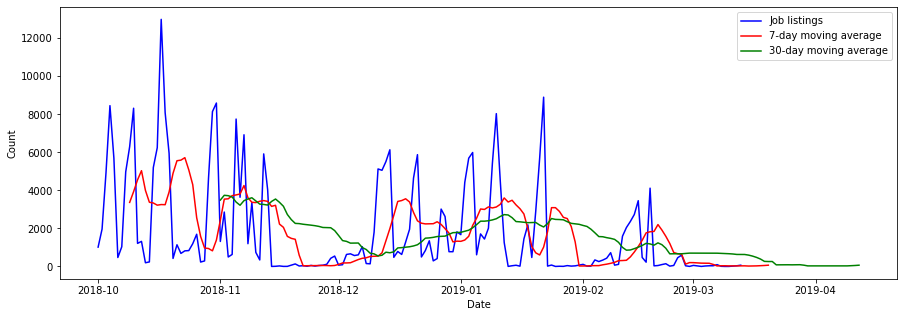

In [18]:
periodLength = dateDistribution.shape[0]

seven_day_ma = get_moving_average(dateDistribution, 7, periodLength+7)
thirty_day_ma = get_moving_average(dateDistribution, 30, periodLength+30)

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(ax=ax, data=dateDistribution, x='Date', y='Count', color='b')
sns.lineplot(ax=ax, data=seven_day_ma, x='Date', y='Count', color='r')
sns.lineplot(ax=ax, data=thirty_day_ma, x='Date', y='Count', color='g')

ax.legend(labels=["Job listings", "7-day moving average", "30-day moving average"])
ax.set_xlabel('Date')
ax.set_ylabel('Count')

In [ ]:
# give recommendation for best MA model with reasoning here

In [26]:
# import needed modules
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
#Favourite sector/classification: Information & Communication Technology
ict = df.loc[df['Classification'] == 'Information & Communication Technology'].copy()
display(ict.head(3))
ict.shape

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
89,37404291,Technical Support Engineer,FTI Consulting,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Act as an advisor to staff in all practice are...,NaN,0,30,NaN,15.0
96,37404325,Business Development Manager,TPG Telecom Limited,2018-10-07,Perth,"CBD, Inner & Western Suburbs",Information & Communication Technology,Sales - Pre & Post,Looking to get your foot in the door in a care...,NaN,0,30,NaN,15.0
127,37404230,Systems Engineer,Humanised Group,2018-10-07,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0,30,Full Time,15.0


(20960, 14)

In [46]:
# Preprocessing
# Tokenize
ict['tokens'] = ict.apply(lambda row: word_tokenize(row['Requirement']), axis=1)

# Remove punctuation
ict['alpha'] = ict['tokens'].apply(lambda x: [item for item in x if item.isalpha()])

# Remove stop words
stop_words = stopwords.words('english')
ict['stop'] = ict['alpha'].apply(lambda x: [item for item in x if item not in stop_words])

# Stem
stemmer = PorterStemmer()
ict['stemmed'] = ict['stop'].apply(lambda x: [stemmer.stem(item) for item in x])
ict['stemmed']

89        [act, advisor, staff, practic, area, it, issu,...
96        [look, get, foot, door, career, sale, join, on...
127       [system, engin, work, lead, msp, treat, employ...
130       [readi, challeng, opportun, part, one, excit, ...
133       [do, strong, technic, support, skill, love, wo...
                                ...                        
197204    [senior, data, engin, requir, build, devic, io...
197208    [multipl, job, opportun, canberra, locat, tspv...
197217                    [abil, deliv, wide, feder, model]
197218    [great, opportun, it, test, it, test, analyst,...
197228    [vmware, engin, need, vmware, migrat, project,...
Name: stemmed, Length: 20960, dtype: object

In [47]:
# Compute the BOW
vectorizer = CountVectorizer(lowercase = False, analyzer = lambda x: x)
bow = vectorizer.fit_transform(ict["stemmed"]).toarray()
bow.shape

(20960, 5766)

In [48]:
# Compute the TF 
tf = pd.DataFrame(data=bow, columns=vectorizer.get_feature_names())
tf = tf.divide(tf.sum(axis=1), axis=0)

# Compute the IDF
idf = pd.DataFrame(data=bow, columns=vectorizer.get_feature_names())
idf[idf>1] = 1
idf = np.log(len(idf)/idf.sum(axis=0))

# Compute the TF-IDF
tfidf = tf * idf
tfidf

,a,aa,aaa,aam,aaron,abap,abbotsford,abc,abil,abl,...,zealand,zendesk,zeplin,zero,zetta,znode,zoho,zone,zoo,zscaler
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.126577,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# 25 words with the highest TF-IDF on average
print("Hightst ranked words words:")
print(tfidf.max(axis=0).sort_values(ascending=False)[:5])

Hightst ranked words words:
avocado      9.950371
tibco        7.242321
till         6.189171
interview    5.632883
bau          5.484463
dtype: float64


In [73]:
top50ict = tfidf.max(axis=0).sort_values(ascending=False)[:50]
top50ict

avocado         9.950371
tibco           7.242321
till            6.189171
interview       5.632883
bau             5.484463
synolog         4.975186
appasur         4.975186
c               4.719263
vlociti         4.425879
webbi           4.425879
cryptographi    4.425879
istqb           4.282038
interpro        4.282038
m               3.876573
backfil         3.876573
siebel          3.876573
freelanc        3.823893
copper          3.776238
backup          3.452924
mainfram        3.365748
certifi         3.327267
advert          3.316790
sitecor         3.309083
skype           3.274587
vic             3.242318
bonu            3.143405
radiolog        3.085741
mdu             3.085741
superstream     3.085741
adm             3.085741
deveop          3.085741
datapow         3.085741
tririga         3.085741
start           3.080318
qa              3.060865
microservic     2.980694
bhp             2.950586
secop           2.950586
sso             2.950586
today           2.936417


In [74]:
# export to .csv file that can be used to generate word cloud 
top50ict.to_csv('top50ict.csv', sep=';')

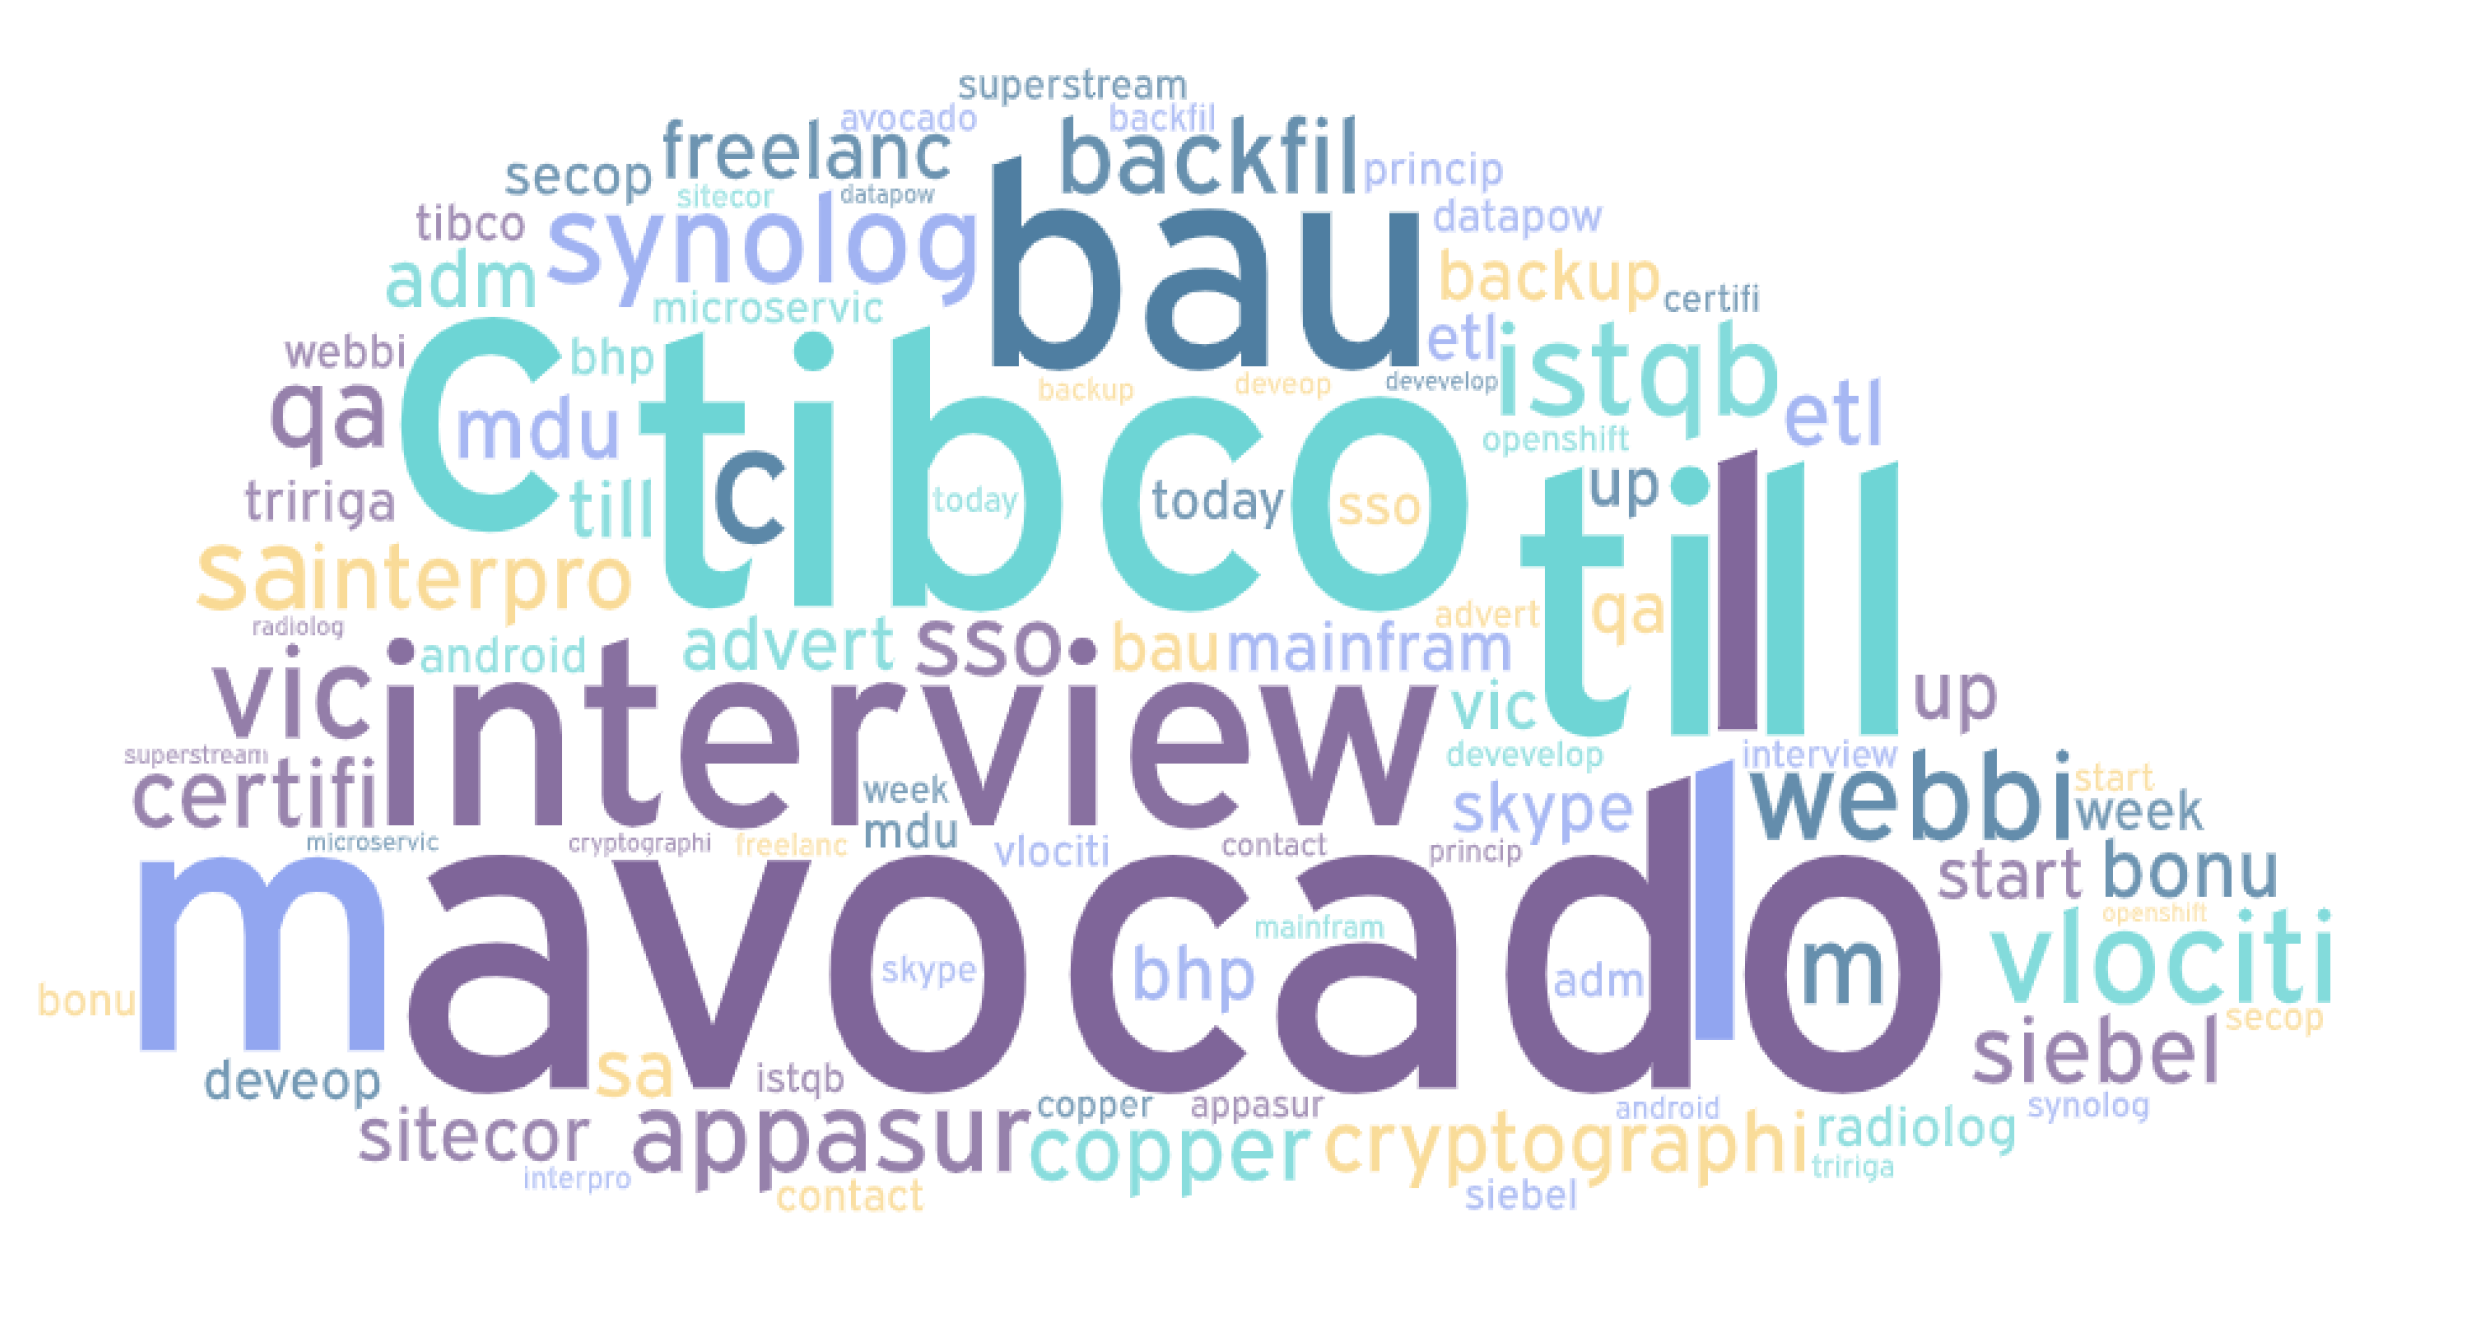

<h2>Part 4 – Discussion. [4 points] </h2>

<ul>
    <li><strong>Scenario 1:</strong> Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words) </li>
    <li><strong>Scenario 2:</strong> To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.*** ( Max 750 words)</li>
</ul>

In [ ]:
#1 -> Ben
#2 -> Julius

In [ ]:
#focus on brisbane jobs

In [ ]:
#NOTES:
#ask about handeling of duplicates
#does the MA look right?